In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
df = pd.read_csv('../datasets/loan_approval_dataset.csv').head(1000)

In [3]:
df.drop(0)

,Unnamed: 0,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
1,1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
5,5,6,6915937,64,0,single,rented,no,Civil_servant,Jalgaon,Maharashtra,0,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,996,6907195,55,5,single,owned,no,Police_officer,Dharmavaram,Andhra_Pradesh,3,10,0
996,996,997,9253093,54,2,single,rented,yes,Secretary,Danapur,Bihar,2,12,1
997,997,998,9464966,67,14,single,norent_noown,yes,Statistician,Tiruppur,Tamil_Nadu,14,10,0
998,998,999,3346084,23,18,single,rented,no,Web_designer,Sambalpur,Odisha,6,13,0


In [4]:
df.head()

,Unnamed: 0,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [5]:
df.columns

Index(['Unnamed: 0', 'Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [6]:
df.drop(columns=['Unnamed: 0','Id'],inplace=True)

In [7]:
categorical_featues = df.select_dtypes(include='object').columns
categorical_featues

Index(['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession',
       'CITY', 'STATE'],
      dtype='object')

In [8]:
for col in df[categorical_featues]:
    print(df[col].value_counts())
    print("\n")

Married/Single
single     889
married    111
Name: count, dtype: int64


House_Ownership
rented          920
owned            51
norent_noown     29
Name: count, dtype: int64


Car_Ownership
no     710
yes    290
Name: count, dtype: int64


Profession
Fashion_Designer              30
Secretary                     29
Software_Developer            29
Politician                    28
Biomedical_Engineer           28
Economist                     27
Flight_attendant              26
Magistrate                    26
Physician                     25
Firefighter                   25
Hotel_Manager                 24
Graphic_Designer              23
Lawyer                        23
Microbiologist                22
Technical_writer              22
Drafter                       22
Computer_operator             22
Engineer                      22
Police_officer                21
Chef                          20
Financial_Analyst             20
Artist                        20
Dentist               

In [9]:
df.Profession.unique()

array(['Mechanical_engineer', 'Software_Developer', 'Technical_writer',
       'Civil_servant', 'Librarian', 'Economist', 'Flight_attendant',
       'Architect', 'Designer', 'Physician', 'Financial_Analyst',
       'Air_traffic_controller', 'Politician', 'Police_officer', 'Artist',
       'Surveyor', 'Design_Engineer', 'Chemical_engineer',
       'Hotel_Manager', 'Dentist', 'Comedian', 'Biomedical_Engineer',
       'Graphic_Designer', 'Computer_hardware_engineer',
       'Petroleum_Engineer', 'Secretary', 'Computer_operator',
       'Chartered_Accountant', 'Technician', 'Microbiologist',
       'Fashion_Designer', 'Aviator', 'Psychologist', 'Magistrate',
       'Lawyer', 'Firefighter', 'Engineer', 'Official', 'Analyst',
       'Geologist', 'Drafter', 'Statistician', 'Web_designer',
       'Consultant', 'Chef', 'Army_officer', 'Surgeon', 'Scientist',
       'Civil_engineer', 'Industrial_Engineer', 'Technology_specialist'],
      dtype=object)

In [10]:
df.CITY.unique()

array(['Rewa', 'Parbhani', 'Alappuzha', 'Bhubaneswar',
       'Tiruchirappalli[10]', 'Jalgaon', 'Tiruppur', 'Jamnagar',
       'Kota[6]', 'Karimnagar', 'Hajipur[31]', 'Adoni', 'Erode[17]',
       'Kollam', 'Madurai', 'Anantapuram[24]', 'Kamarhati', 'Bhusawal',
       'Sirsa', 'Amaravati', 'Secunderabad', 'Ahmedabad', 'Ajmer',
       'Ongole', 'Miryalaguda', 'Ambattur', 'Indore', 'Pondicherry',
       'Shimoga', 'Chennai', 'Gulbarga', 'Khammam', 'Saharanpur',
       'Gopalpur', 'Amravati', 'Udupi', 'Howrah', 'Aurangabad[39]',
       'Hospet', 'Shimla', 'Khandwa', 'Bidhannagar', 'Bellary', 'Danapur',
       'Purnia[26]', 'Bijapur', 'Patiala', 'Malda', 'Sagar', 'Durgapur',
       'Junagadh', 'Singrauli', 'Agartala', 'Thanjavur', 'Hindupur',
       'Naihati', 'North_Dumdum', 'Panchkula', 'Anantapur', 'Serampore',
       'Bathinda', 'Nadiad', 'Kanpur', 'Haridwar', 'Berhampur',
       'Jamshedpur', 'Hyderabad', 'Bidar', 'Kottayam', 'Solapur',
       'Suryapet', 'Aizawl', 'Asansol', 'Deoghar'

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Income             1000 non-null   int64 
 1   Age                1000 non-null   int64 
 2   Experience         1000 non-null   int64 
 3   Married/Single     1000 non-null   object
 4   House_Ownership    1000 non-null   object
 5   Car_Ownership      1000 non-null   object
 6   Profession         1000 non-null   object
 7   CITY               1000 non-null   object
 8   STATE              1000 non-null   object
 9   CURRENT_JOB_YRS    1000 non-null   int64 
 10  CURRENT_HOUSE_YRS  1000 non-null   int64 
 11  Risk_Flag          1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [12]:
df.isnull().sum()

Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [13]:
X=df.drop(columns='Risk_Flag')

In [14]:
X

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14
...,...,...,...,...,...,...,...,...,...,...,...
995,6907195,55,5,single,owned,no,Police_officer,Dharmavaram,Andhra_Pradesh,3,10
996,9253093,54,2,single,rented,yes,Secretary,Danapur,Bihar,2,12
997,9464966,67,14,single,norent_noown,yes,Statistician,Tiruppur,Tamil_Nadu,14,10
998,3346084,23,18,single,rented,no,Web_designer,Sambalpur,Odisha,6,13


In [15]:
y=df['Risk_Flag']

In [16]:
y

0      0
1      0
2      0
3      1
4      1
      ..
995    0
996    1
997    0
998    0
999    0
Name: Risk_Flag, Length: 1000, dtype: int64

In [17]:
cat_features = X.select_dtypes(include='object').columns
num_features = X.select_dtypes(exclude='object').columns

In [18]:
cat_features

Index(['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession',
       'CITY', 'STATE'],
      dtype='object')

In [19]:
num_features

Index(['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS'], dtype='object')

In [20]:
X.shape

(1000, 11)

In [21]:
valid_indices = list(range(X.shape[1]))  # Ensure indexing within bounds
valid_indices

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [22]:
X.shape

(1000, 11)

In [23]:
X.columns

Index(['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership',
       'Car_Ownership', 'Profession', 'CITY', 'STATE', 'CURRENT_JOB_YRS',
       'CURRENT_HOUSE_YRS'],
      dtype='object')

In [24]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
cat_features = X.select_dtypes(include='object').columns
num_features = X.select_dtypes(exclude='object').columns
numeric_tranformer = StandardScaler()
categorical_tranformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('StandardScalar',numeric_tranformer,num_features),
        ('OneHotEncoder',categorical_tranformer,cat_features)
    ]
)

In [25]:
cat_features,num_features

(Index(['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession',
        'CITY', 'STATE'],
       dtype='object'),
 Index(['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS'], dtype='object'))

In [26]:
# lst_df

In [97]:
X = preprocessor.fit_transform(X)

In [98]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 11000 stored elements and shape (1000, 399)>

In [28]:
df.iloc[-1]

Income                         5472585
Age                                 63
Experience                          17
Married/Single                 married
House_Ownership                 rented
Car_Ownership                       no
Profession           Computer_operator
CITY                    Ramagundam[27]
STATE                        Telangana
CURRENT_JOB_YRS                      6
CURRENT_HOUSE_YRS                   11
Risk_Flag                            0
Name: 999, dtype: object

In [29]:
import pickle
# Fit the preprocessor on training data

# Save to a pickle file
with open('preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)

print("Preprocessor saved successfully!")


Preprocessor saved successfully!


In [30]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 11000 stored elements and shape (1000, 399)>

In [31]:
X.shape

(1000, 399)

In [32]:
for feature in cat_features:
    print(feature,":",df[feature].value_counts(),"\n")

Married/Single : Married/Single
single     889
married    111
Name: count, dtype: int64 

House_Ownership : House_Ownership
rented          920
owned            51
norent_noown     29
Name: count, dtype: int64 

Car_Ownership : Car_Ownership
no     710
yes    290
Name: count, dtype: int64 

Profession : Profession
Fashion_Designer              30
Secretary                     29
Software_Developer            29
Politician                    28
Biomedical_Engineer           28
Economist                     27
Flight_attendant              26
Magistrate                    26
Physician                     25
Firefighter                   25
Hotel_Manager                 24
Graphic_Designer              23
Lawyer                        23
Microbiologist                22
Technical_writer              22
Drafter                       22
Computer_operator             22
Engineer                      22
Police_officer                21
Chef                          20
Financial_Analyst       

In [33]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 399), (200, 399))

In [34]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score,roc_auc_score

In [35]:
def evaluate_model_score(y_test,y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    return accuracy,precision,recall,f1,roc_auc
    

In [36]:
def evaluate_model(true, predicted):
    accuracy_scores = accuracy_score(true, predicted)
    confusion_matrixs = (true, predicted)
    classification_reports=classification_report(true, predicted)

    return accuracy_scores,confusion_matrixs,classification_reports

In [37]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier

In [38]:
classification_models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(),
    "Support Vector Machine (SVM)": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Naive Bayes": GaussianNB(),
    "Ridge Classifier": RidgeClassifier(),
    "Extra Trees Classifier": ExtraTreesClassifier(),
}

# Print the dictionary of classification models
for model_name, model in classification_models.items():
    print(f"{model_name}: {model}")

Logistic Regression: LogisticRegression()
K-Nearest Neighbors (KNN): KNeighborsClassifier()
Support Vector Machine (SVM): SVC()
Decision Tree: DecisionTreeClassifier()
Random Forest: RandomForestClassifier()
Gradient Boosting: GradientBoostingClassifier()
AdaBoost: AdaBoostClassifier()
Naive Bayes: GaussianNB()
Ridge Classifier: RidgeClassifier()
Extra Trees Classifier: ExtraTreesClassifier()


In [39]:
models_list=[]
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
roc_auc_list = []

for model_name,model in classification_models.items():
    X_train_dense = X_train.toarray() if hasattr(X_train, 'toarray') else X_train
    X_test_dense = X_test.toarray() if hasattr(X_test, 'toarray') else X_test

    model.fit(X_train_dense,y_train)

    y_train_pred = model.predict(X_train_dense)
    y_test_pred = model.predict(X_test_dense)

    accuracy,precision,recall,f1,roc_auc = evaluate_model_score(y_train,y_train_pred)
    accuracy2,precision2,recall2,f12,roc_auc2 = evaluate_model_score(y_test,y_test_pred)

    models_list.append(model)
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    roc_auc_list.append(roc_auc)

     
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")
    print(f"ROC-AUC: {roc_auc}")
    print("\n")

results_df = pd.DataFrame({
    'Model': models_list,
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1-Score': f1_list,
    'ROC-AUC': roc_auc_list
})

# Display the results
print(results_df)
best_model = results_df.loc[results_df['F1-Score'].idxmax()]
print(f"Best Model based on F1-Score:\n{best_model}")


Model: Logistic Regression
Accuracy: 0.8525
Precision: 0.9545454545454546
Recall: 0.15217391304347827
F1-Score: 0.2625
ROC-AUC: 0.5753316695126757


Model: K-Nearest Neighbors (KNN)
Accuracy: 0.845
Precision: 0.6166666666666667
Recall: 0.26811594202898553
F1-Score: 0.37373737373737376
ROC-AUC: 0.6166863698060336




f:\loan-approval-system\loan-approval-system\heartenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
f:\loan-approval-system\loan-approval-system\heartenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model: Support Vector Machine (SVM)
Accuracy: 0.8275
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
ROC-AUC: 0.5


Model: Decision Tree
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
ROC-AUC: 1.0




f:\loan-approval-system\loan-approval-system\heartenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model: Random Forest
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
ROC-AUC: 1.0


Model: Gradient Boosting
Accuracy: 0.88625
Precision: 1.0
Recall: 0.34057971014492755
F1-Score: 0.5081081081081081
ROC-AUC: 0.6702898550724637




f:\loan-approval-system\loan-approval-system\heartenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
f:\loan-approval-system\loan-approval-system\heartenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model: AdaBoost
Accuracy: 0.8275
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
ROC-AUC: 0.5


Model: Naive Bayes
Accuracy: 0.80125
Precision: 0.46464646464646464
Recall: 1.0
F1-Score: 0.6344827586206897
ROC-AUC: 0.8799093655589124


Model: Ridge Classifier
Accuracy: 0.88375
Precision: 0.8947368421052632
Recall: 0.3695652173913043
F1-Score: 0.5230769230769231
ROC-AUC: 0.6802508866412714


Model: Extra Trees Classifier
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
ROC-AUC: 1.0


                                               Model  Accuracy  Precision  \
0                               LogisticRegression()   0.85250   0.954545   
1                             KNeighborsClassifier()   0.84500   0.616667   
2                                              SVC()   0.82750   0.000000   
3                           DecisionTreeClassifier()   1.00000   1.000000   
4  (DecisionTreeClassifier(max_features='sqrt', r...   1.00000   1.000000   
5  ([DecisionTreeRegressor(criterion='friedman_ms...

In [107]:
# print(results_df)
# results_df = pd.DataFrame(results_df)
best_model = results_df.loc[results_df['F1-Score'].idxmax()]
# print(f"Best Model based on F1-Score:\n{best_model}")
# print(f"Type Of Best Model{type(best_model)}")



In [108]:
df.columns

Index(['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership',
       'Car_Ownership', 'Profession', 'CITY', 'STATE', 'CURRENT_JOB_YRS',
       'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [105]:
best_model['Model']

RandomForestClassifier()

In [100]:
results_df

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
4,"(DecisionTreeClassifier(max_features='sqrt', r...",1.00000,1.000000,1.000000,1.000000,1.000000
3,DecisionTreeClassifier(),1.00000,1.000000,1.000000,1.000000,1.000000
9,"(ExtraTreeClassifier(random_state=742452098), ...",1.00000,1.000000,1.000000,1.000000,1.000000
7,GaussianNB(),0.80125,0.464646,1.000000,0.634483,0.879909
8,RidgeClassifier(),0.88375,0.894737,0.369565,0.523077,0.680251
5,([DecisionTreeRegressor(criterion='friedman_ms...,0.88625,1.000000,0.340580,0.508108,0.670290
1,KNeighborsClassifier(),0.84500,0.616667,0.268116,0.373737,0.616686
0,LogisticRegression(),0.85250,0.954545,0.152174,0.262500,0.575332
2,SVC(),0.82750,0.000000,0.000000,0.000000,0.500000
6,"(DecisionTreeClassifier(max_depth=1, random_st...",0.82750,0.000000,0.000000,0.000000,0.500000


In [102]:
# print(results_df)
type(best_model)

sklearn.tree._classes.DecisionTreeClassifier

In [41]:
results_df = pd.DataFrame(results_df).sort_values(by='F1-Score', ascending=False)
results_df

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
4,"(DecisionTreeClassifier(max_features='sqrt', r...",1.00000,1.000000,1.000000,1.000000,1.000000
3,DecisionTreeClassifier(),1.00000,1.000000,1.000000,1.000000,1.000000
9,"(ExtraTreeClassifier(random_state=742452098), ...",1.00000,1.000000,1.000000,1.000000,1.000000
7,GaussianNB(),0.80125,0.464646,1.000000,0.634483,0.879909
8,RidgeClassifier(),0.88375,0.894737,0.369565,0.523077,0.680251
5,([DecisionTreeRegressor(criterion='friedman_ms...,0.88625,1.000000,0.340580,0.508108,0.670290
1,KNeighborsClassifier(),0.84500,0.616667,0.268116,0.373737,0.616686
0,LogisticRegression(),0.85250,0.954545,0.152174,0.262500,0.575332
2,SVC(),0.82750,0.000000,0.000000,0.000000,0.500000
6,"(DecisionTreeClassifier(max_depth=1, random_st...",0.82750,0.000000,0.000000,0.000000,0.500000


In [42]:
best_model = results_df.loc[results_df['F1-Score'].idxmax()]
print(f"Best Model based on F1-Score:\n{best_model}")

Best Model based on F1-Score:
Model        (DecisionTreeClassifier(max_features='sqrt', r...
Accuracy                                                   1.0
Precision                                                  1.0
Recall                                                     1.0
F1-Score                                                   1.0
ROC-AUC                                                    1.0
Name: 4, dtype: object


In [43]:
type(best_model)

pandas.core.series.Series

In [99]:
ds = DecisionTreeClassifier()
ds.fit(X_train,y_train)
predictions=ds.predict(X_test)

In [45]:
print(accuracy_score(y_test,predictions))
print(f1_score(y_test,predictions))
print(recall_score(y_test,predictions))
print(precision_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))

0.73
0.18181818181818182
0.1935483870967742
0.17142857142857143
[[140  29]
 [ 25   6]]


In [46]:
# ...existing code...

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
model = DecisionTreeClassifier()

# Apply GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit the model
grid_search.fit(X_train_dense, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions with the best model
predictions = best_model.predict(X_test)

# Evaluate the best model
best_score = grid_search.best_score_
best_params = grid_search.best_params_

print(f"Best F1-Score: {best_score}")
print(f"Best Parameters: {best_params}")

# ...existing code...

Best F1-Score: 0.24706637468851467
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}


In [47]:
print(accuracy_score(y_test,predictions))
print(f1_score(y_test,predictions))
print(recall_score(y_test,predictions))
print(precision_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))

0.72
0.06666666666666667
0.06451612903225806
0.06896551724137931
[[142  27]
 [ 29   2]]


In [48]:
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 8800 stored elements and shape (800, 399)>

In [49]:
model_ds = DecisionTreeClassifier()
model_ds.fit(X_train,y_train)
predictions=model_ds.predict(X_test)

In [50]:
import pickle

# Train your model (example with a generic model)

# Save the model to a pickle file
with open('model.pkl', 'wb') as file:
    pickle.dump(model_ds, file)

In [51]:
import pickle

# Load the model from the pickle file
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Make predictions with the loaded model
predictions = loaded_model.predict(X_test)

In [52]:
lst  =df.head(1)
type(lst)

pandas.core.frame.DataFrame

In [109]:
model_ds

DecisionTreeClassifier()

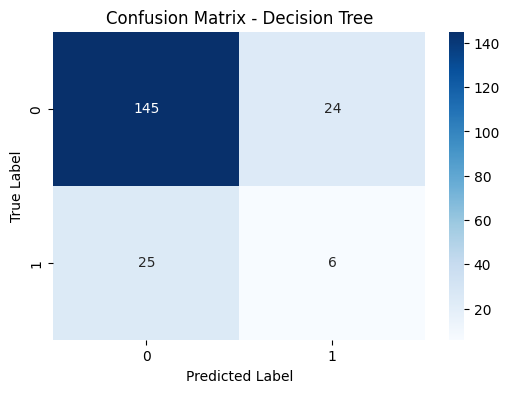

In [114]:
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

In [119]:
categorical_featues

Index(['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession',
       'CITY', 'STATE'],
      dtype='object')

In [126]:
feature_names = list(df[categorical_featues].columns)

feature_names


['Married/Single',
 'House_Ownership',
 'Car_Ownership',
 'Profession',
 'CITY',
 'STATE']

In [131]:
ff = df.drop(columns=['Risk_Flag'])

IndexError: index 249 is out of bounds for axis 0 with size 11

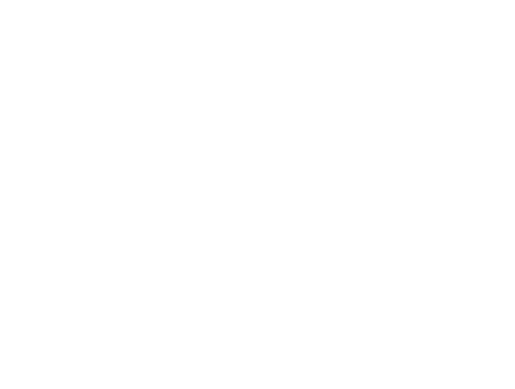

In [132]:
from sklearn.tree import plot_tree
plot_tree(model_ds, feature_names=ff.columns, filled=True)

KeyError: np.int64(5)

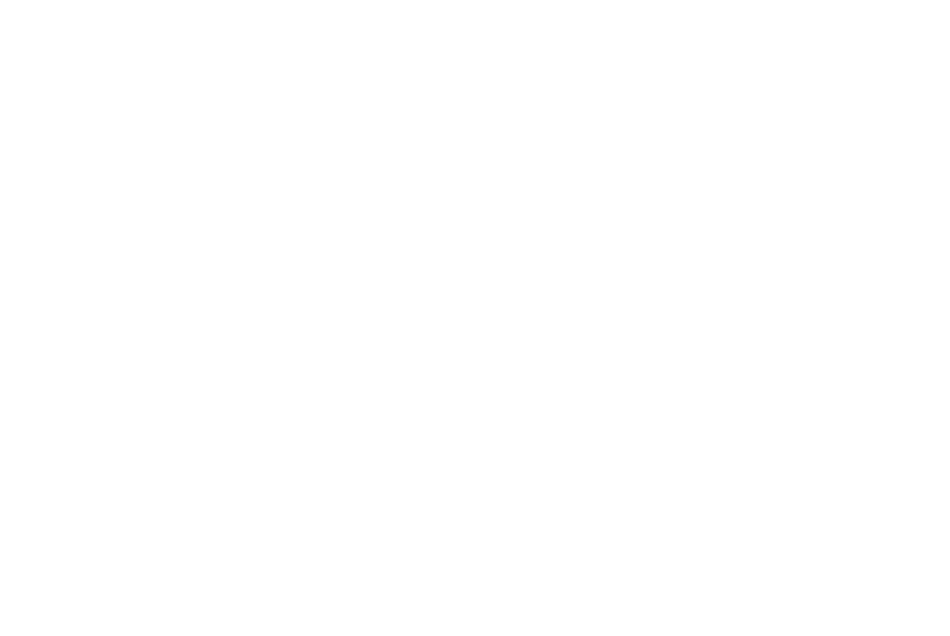

In [122]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(model_ds, feature_names=df[categorical_featues] ,filled=True)
plt.title("Decision Tree Structure")
plt.show()


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 2 with shape (399,) and arg 3 with shape (12,).

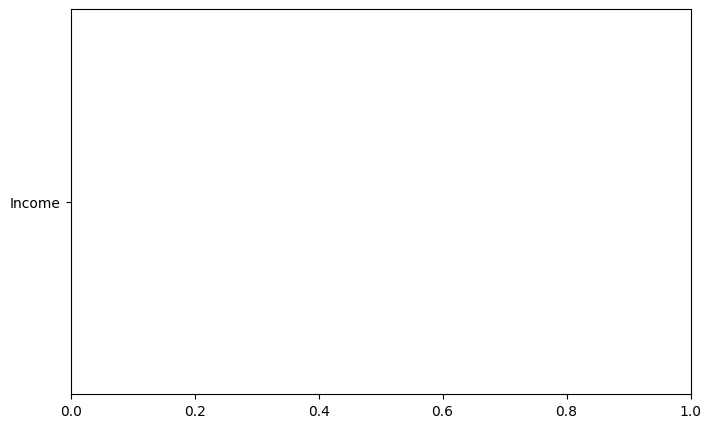

In [123]:
import numpy as np

# Get feature importance
feature_importance = model_ds.feature_importances_

# Plot Feature Importance
plt.figure(figsize=(8, 5))
plt.barh(df.columns, feature_importance, color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Decision Tree")
plt.show()


In [53]:
df.columns

Index(['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership',
       'Car_Ownership', 'Profession', 'CITY', 'STATE', 'CURRENT_JOB_YRS',
       'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [54]:
lst

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0


In [56]:
loaded_model.predict(preprocessor.transform(lst))

array([0])

In [57]:
predictions

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0])

In [58]:
df.columns

Index(['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership',
       'Car_Ownership', 'Profession', 'CITY', 'STATE', 'CURRENT_JOB_YRS',
       'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [59]:
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [60]:
df.House_Ownership.unique()

array(['rented', 'norent_noown', 'owned'], dtype=object)

In [61]:
# lst = [12000,31, 1,'single','owned','no','Software_Developer','Rewa','Tamil_Nadu',1,1]
# lst = preprocessor.transform(lst)


In [62]:

# # Your input list
# lst = [12000, 31, 1, 'single', 'own', 'no', 'Software_Developer', 'Rewa', 'Tamil_Nadu', 1, 1]

# # Reshape the list to a 2D array
# lst_reshaped = np.array(lst).reshape(1, -1)

# # Transform the reshaped list
# lst_transformed = preprocessor.transform(lst_reshaped)

# # Make predictions with the loaded model
# predictions_out = loaded_model.predict(lst_transformed)

# # Evaluate the predictions
# # ... (your evaluation code here)

In [63]:
df.columns.drop('Risk_Flag')

Index(['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership',
       'Car_Ownership', 'Profession', 'CITY', 'STATE', 'CURRENT_JOB_YRS',
       'CURRENT_HOUSE_YRS'],
      dtype='object')

In [64]:
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [65]:
import numpy as np
import pandas as pd

# Your input list
lst = [12000, 31, 1, 'single', 'owned', 'no', 'Software_Developer', 'Rewa', 'Tamil_Nadu', 1, 1]

# Define the column names (adjust these to match your preprocessor's expected columns)
columns = ['income', 'age', 'dependents', 'marital_status', 'house_ownership', 'car_ownership', 
           'profession', 'city', 'state', 'current_job_years', 'current_house_years']

# Convert the list to a DataFrame
lst_df = pd.DataFrame([lst], columns=df.columns.drop('Risk_Flag'))

# Transform the DataFrame
lst_transformed = preprocessor.transform(lst_df)

# Make predictions with the loaded model
predictions_out_1 = loaded_model.predict(lst_transformed)

# Evaluate the predictions
# ... (your evaluation code here)

In [66]:
lst_df

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,12000,31,1,single,owned,no,Software_Developer,Rewa,Tamil_Nadu,1,1


In [67]:
predictions_out_1

array([1])

In [68]:
df_transform = pd.get_dummies(df,drop_first=True).astype(int)
df_transform

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Married/Single_single,House_Ownership_owned,House_Ownership_rented,Car_Ownership_yes,...,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil_Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar_Pradesh,STATE_Uttar_Pradesh[5],STATE_Uttarakhand,STATE_West_Bengal
0,1303834,23,3,3,13,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,7574516,40,10,9,13,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3991815,66,4,4,10,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,6256451,41,2,2,12,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,5768871,47,11,3,14,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,6907195,55,5,3,10,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
996,9253093,54,2,2,12,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
997,9464966,67,14,14,10,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
998,3346084,23,18,6,13,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Compute the correlation matrix
# corr_matrix = df_transform.corr()

# # Create a heatmap
# plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# # Display the heatmap
# plt.show()

In [70]:
df.columns

Index(['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership',
       'Car_Ownership', 'Profession', 'CITY', 'STATE', 'CURRENT_JOB_YRS',
       'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [71]:
profession_unique  =  df.Profession.unique()

In [72]:
profession_unique

array(['Mechanical_engineer', 'Software_Developer', 'Technical_writer',
       'Civil_servant', 'Librarian', 'Economist', 'Flight_attendant',
       'Architect', 'Designer', 'Physician', 'Financial_Analyst',
       'Air_traffic_controller', 'Politician', 'Police_officer', 'Artist',
       'Surveyor', 'Design_Engineer', 'Chemical_engineer',
       'Hotel_Manager', 'Dentist', 'Comedian', 'Biomedical_Engineer',
       'Graphic_Designer', 'Computer_hardware_engineer',
       'Petroleum_Engineer', 'Secretary', 'Computer_operator',
       'Chartered_Accountant', 'Technician', 'Microbiologist',
       'Fashion_Designer', 'Aviator', 'Psychologist', 'Magistrate',
       'Lawyer', 'Firefighter', 'Engineer', 'Official', 'Analyst',
       'Geologist', 'Drafter', 'Statistician', 'Web_designer',
       'Consultant', 'Chef', 'Army_officer', 'Surgeon', 'Scientist',
       'Civil_engineer', 'Industrial_Engineer', 'Technology_specialist'],
      dtype=object)

In [73]:
len(profession_unique)

51

In [74]:
'Hyderabad' in profession_unique

False

In [75]:
state_unique  =  df.STATE.unique()

In [76]:
state_unique

array(['Madhya_Pradesh', 'Maharashtra', 'Kerala', 'Odisha', 'Tamil_Nadu',
       'Gujarat', 'Rajasthan', 'Telangana', 'Bihar', 'Andhra_Pradesh',
       'West_Bengal', 'Haryana', 'Puducherry', 'Karnataka',
       'Uttar_Pradesh', 'Himachal_Pradesh', 'Punjab', 'Tripura',
       'Uttarakhand', 'Jharkhand', 'Mizoram', 'Assam',
       'Jammu_and_Kashmir', 'Delhi', 'Chhattisgarh', 'Chandigarh',
       'Uttar_Pradesh[5]', 'Manipur', 'Sikkim'], dtype=object)

In [77]:
'Telangana' in state_unique

True

In [78]:
state_unique = df.CITY.unique()

In [79]:
'Hyderabad' in state_unique

True

In [80]:
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [81]:
df.columns

Index(['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership',
       'Car_Ownership', 'Profession', 'CITY', 'STATE', 'CURRENT_JOB_YRS',
       'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [82]:
df.select_dtypes(exclude='object').columns

Index(['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS',
       'Risk_Flag'],
      dtype='object')

In [83]:
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [84]:
import pandas as pd 
import pickle
# with open("F:\loan-approval-system\loan-approval-system\notebooks\pycaret-automation\assets\model.pkl",encoding='utf-8') as file:
#     model = pickle.load(file)


In [85]:
import pandas as pd

train_df = pd.read_csv("../artifacts/train.csv")
test_df = pd.read_csv("../artifacts/test.csv")

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)


Train shape: (799, 14)
Test shape: (200, 14)


In [86]:
import numpy as np 
import pandas as pd 
import sys
from src.logger import logging
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from dataclasses import dataclass
import os 
from src.execption import CustomException
from src.utils import save_object
@dataclass
class DataTransformationConfig:
    preprocessor_obj_path = os.path.join("artifacts","preprocessor.pkl")


class DataTransformation:
    def __init__(self):
        self.data_transformation_config= DataTransformationConfig()

    def get_data_transformer_object(self):
        """  This method is used to get the data transformation object i.e preprocessor object which is used to transform the data"""

            # Wrap in a list to make it a row
        numeric_features = ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']
    
        categorical_features =  ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession',
    'CITY', 'STATE']
        logging.info("Preprocessing for numerical and categorical features initiated")
        num_pipeline = Pipeline(
            steps=[
                ('imputer',SimpleImputer(strategy='median')),
                ('scaler',StandardScaler())
            ]
        )
        
        cat_pipeline = Pipeline(
            steps=[
                ('imputer',SimpleImputer(strategy='most_frequent')),
                ('onehot',OneHotEncoder(handle_unknown='ignore')),
                ('scaler',StandardScaler(with_mean=False))
            ]
        )
        logging.info(f"Numerical Features: {numeric_features}")
        logging.info(f"Categorical Features: {categorical_features}")

        logging.info("Column Transformer initiated")

        preprocessor = ColumnTransformer(
            [
                ('num_pipeline',num_pipeline,numeric_features),
                ('cat_pipeline',cat_pipeline,categorical_features)
            ]
        )

        logging.info("Preprocessor object created successfully ")

        return preprocessor

    def initiate_data_transformation(self,train_path,test_path):

            train_df = pd.read_csv(train_path)
            test_df = pd.read_csv(test_path)
            logging.info("Data Transformation initiated")
            logging.info("Read train and test data completed!")

            logging.info("Getting the preprocessor object")
            preprocessor_obj = self.get_data_transformer_object()
            target_column_name="Risk_Flag"  
            cat_features = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession',
                'CITY', 'STATE']
            num_features = ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS',]
      
            numeric_features =  num_features
            categorical_features = cat_features
            
            input_feature_train_df = train_df.drop(columns=[target_column_name],axis=1)
            target_feature_train_df = train_df[target_column_name]

            input_feature_test_df = test_df.drop(columns=[target_column_name],axis=1)
            target_feature_test_df = test_df[target_column_name]

            logging.info("Applying the preprocessor object to train and test dataframe")

            input_feature_train_arr=preprocessor_obj.fit_transform(input_feature_train_df)
            # input_feature_test_arr=preprocessor_obj.transform(input_feature_test_df)
            input_feature_test_arr=preprocessor_obj.transform(input_feature_test_df)

            # train_arr = np.c_[input_feature_train_arr,np.array(target_feature_train_df)]
            # test_arr = np.c_[input_feature_test_arr,np.array(target_feature_test_df)]
            print("Train transformed features shape:", input_feature_train_arr.shape)
            print("Train target shape:", np.array(target_feature_train_df).shape)
            print("Test transformed features shape:", input_feature_test_arr.shape)
            print("Test target shape:", np.array(target_feature_test_df).shape)


            train_arr = np.c_[input_feature_train_arr, np.array(target_feature_train_df).reshape(-1, 1)]
            test_arr = np.c_[input_feature_test_arr, np.array(target_feature_test_df).reshape(-1, 1)]


            logging.info("Data Transformation Completed Successfully and saved the preprocessing object")

            save_object(
                file_path = self.data_transformation_config.preprocessor_obj_path,
                obj = preprocessor_obj

            )

            return (train_arr,
                    test_arr,
                    self.data_transformation_config.preprocessor_obj_path)


ModuleNotFoundError: No module named 'dill'

In [ ]:
data_transformation = DataTransformation()
train_arr,test_arr = data_transformation.initiate_data_transformation("../artifacts/train.csv","../artifacts/test.csv")

Train transformed features shape: (799, 390)
Train target shape: (799,)
Test transformed features shape: (200, 390)
Test target shape: (200,)


CustomException: Error occurred in python script C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8520\993104656.py line number 102 error message all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 1 and the array at index 1 has size 799

In [ ]:
# input_feature_train_df
target_feature_train_df

0      0
1      0
2      0
3      1
4      1
      ..
794    0
795    0
796    0
797    0
798    0
Name: Risk_Flag, Length: 799, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
import logging

# Assuming train_df and test_df are already defined
# train_df = pd.read_csv(train_path)
# test_df = pd.read_csv(test_path)

logging.info("Data Transformation initiated")
logging.info("Read train and test data completed!")

logging.info("Getting the preprocessor object")

preprocessor_obj = data_transformation.get_data_transformer_object()
target_column_name = "Risk_Flag"
cat_features = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']
num_features = ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']

numeric_features = num_features
categorical_features = cat_features

input_feature_train_df = train_df.drop(columns=[target_column_name], axis=1)
target_feature_train_df = train_df[target_column_name]

input_feature_test_df = test_df.drop(columns=[target_column_name], axis=1)
target_feature_test_df = test_df[target_column_name]

# Split the training data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(input_feature_train_df, target_feature_train_df, test_size=0.2, random_state=42)

logging.info("Applying the preprocessor object to train and test dataframe")

input_feature_train_arr = preprocessor_obj.fit_transform(X_train)
input_feature_val_arr = preprocessor_obj.transform(X_test)
input_feature_test_arr = preprocessor_obj.transform(input_feature_test_df)

print("Train transformed features shape:", input_feature_train_arr.shape)
print("Train target shape:", np.array(y_train).shape)
print("Validation transformed features shape:", input_feature_val_arr.shape)
print("Validation target shape:", np.array(y_test).shape)
print("Test transformed features shape:", input_feature_test_arr.shape)
print("Test target shape:", np.array(target_feature_test_df).shape)

Train transformed features shape: (639, 364)
Train target shape: (639,)
Validation transformed features shape: (160, 364)
Validation target shape: (160,)
Test transformed features shape: (200, 364)
Test target shape: (200,)


In [ ]:

train_arr = np.c_[input_feature_train_arr, target_feature_train_df.to_numpy().reshape(-1, 1)]
test_arr = np.c_[input_feature_test_arr, target_feature_test_df.to_numpy().reshape(-1, 1)]


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 1 and the array at index 1 has size 799

In [87]:
# train_df = pd.read_csv(train_path)
# test_df = pd.read_csv(test_path)
logging.info("Data Transformation initiated")
logging.info("Read train and test data completed!")

logging.info("Getting the preprocessor object")

preprocessor_obj = data_transformation.get_data_transformer_object()
target_column_name="Risk_Flag"  
cat_features = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession',
    'CITY', 'STATE']
num_features = ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS',]

numeric_features =  num_features
categorical_features = cat_features

input_feature_train_df = train_df.drop(columns=[target_column_name],axis=1)
target_feature_train_df = train_df[target_column_name]

input_feature_test_df = test_df.drop(columns=[target_column_name],axis=1)
target_feature_test_df = test_df[target_column_name]

X_train,X_test,y_train,y_test = train_test_split(input_feature_train_df,target_feature_train_df,test_size=0.2,random_state=42)
logging.info("Applying the preprocessor object to train and test dataframe")

input_feature_train_arr=preprocessor_obj.fit_transform(input_feature_train_df)
# input_feature_test_arr=preprocessor_obj.transform(input_feature_test_df)
input_feature_test_arr=preprocessor_obj.transform(input_feature_test_df)

# train_arr = np.c_[input_feature_train_arr,np.array(target_feature_train_df)]
# test_arr = np.c_[input_feature_test_arr,np.array(target_feature_test_df)]
print("Train transformed features shape:", input_feature_train_arr.shape)
print("Train target shape:", np.array(target_feature_train_df).shape)
print("Test transformed features shape:", input_feature_test_arr.shape)
print("Test target shape:", np.array(target_feature_test_df).shape)


# train_arr = np.c_[input_feature_train_arr, np.array(target_feature_train_df).reshape(-1, 1)]
# test_arr = np.c_[input_feature_test_arr, np.array(target_feature_test_df).reshape(-1, 1)]


# train_arr = np.c_[input_feature_train_arr, target_feature_train_df.reshape(-1, 1)]
# test_arr = np.c_[input_feature_test_arr, target_feature_test_df.reshape(-1, 1)]




NameError: name 'data_transformation' is not defined

In [88]:
type(input_feature_train_arr)

NameError: name 'input_feature_train_arr' is not defined

In [89]:
np.concatenate(input_feature_train_arr,target_feature_train_df)

NameError: name 'input_feature_train_arr' is not defined

In [90]:
np.concatenate((input_feature_train_arr, target_feature_train_df.to_numpy().reshape(-1, 1)))

NameError: name 'input_feature_train_arr' is not defined

In [91]:
input_feature_train_arr.shape,target_feature_train_df.shape


NameError: name 'input_feature_train_arr' is not defined

In [92]:
train_arr = np.c_[input_feature_train_arr, target_feature_train_df.to_numpy().reshape(-1, 1)]
test_arr = np.c_[input_feature_test_arr, target_feature_test_df.to_numpy().reshape(-1, 1)]


NameError: name 'input_feature_train_arr' is not defined

In [95]:
# Creating a new data transformation object 
X=df.drop(columns=['Risk_Flag'])
X

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14
...,...,...,...,...,...,...,...,...,...,...,...
995,6907195,55,5,single,owned,no,Police_officer,Dharmavaram,Andhra_Pradesh,3,10
996,9253093,54,2,single,rented,yes,Secretary,Danapur,Bihar,2,12
997,9464966,67,14,single,norent_noown,yes,Statistician,Tiruppur,Tamil_Nadu,14,10
998,3346084,23,18,single,rented,no,Web_designer,Sambalpur,Odisha,6,13


In [133]:
models = {
    "0": {
        "Model": "LogisticRegression()",
        "Accuracy": 0.7,
        "Precision": 0.2352941176470588,
        "Recall": 0.1904761904761904,
        "F1-Score": 0.2105263157894736,
        "ROC-AUC": 0.512959614225437
    },
    "1": {
        "Model": "KNeighborsClassifier()",
        "Accuracy": 0.775,
        "Precision": 0.2857142857142857,
        "Recall": 0.0476190476190476,
        "F1-Score": 0.0816326530612244,
        "ROC-AUC": 0.5079867389993973
    },
    "2": {
        "Model": "SVC()",
        "Accuracy": 0.785,
        "Precision": 0.0,
        "Recall": 0.0,
        "F1-Score": 0.0,
        "ROC-AUC": 0.4968354430379746
    },
    "3": {
        "Model": "DecisionTreeClassifier()",
        "Accuracy": 0.735,
        "Precision": 0.2962962962962963,
        "Recall": 0.1904761904761904,
        "F1-Score": 0.2318840579710145,
        "ROC-AUC": 0.5351115129596142
    },
    "4": {
        "Model": "RandomForestClassifier()",
        "Accuracy": 0.79,
        "Precision": 0.0,
        "Recall": 0.0,
        "F1-Score": 0.0,
        "ROC-AUC": 0.5
    }
}

In [135]:
models['0']

{'Model': 'LogisticRegression()',
 'Accuracy': 0.7,
 'Precision': 0.2352941176470588,
 'Recall': 0.1904761904761904,
 'F1-Score': 0.2105263157894736,
 'ROC-AUC': 0.512959614225437}

In [140]:
models = pd.read_csv('../artifacts/results.csv')

In [154]:
models.shape

(10, 6)

In [143]:
models.head()

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,LogisticRegression(),0.700,0.235294,0.190476,0.210526,0.512960
1,KNeighborsClassifier(),0.775,0.285714,0.047619,0.081633,0.507987
2,SVC(),0.785,0.000000,0.000000,0.000000,0.496835
3,DecisionTreeClassifier(),0.735,0.296296,0.190476,0.231884,0.535112
4,RandomForestClassifier(),0.790,0.000000,0.000000,0.000000,0.500000


<Axes: ylabel='Model'>

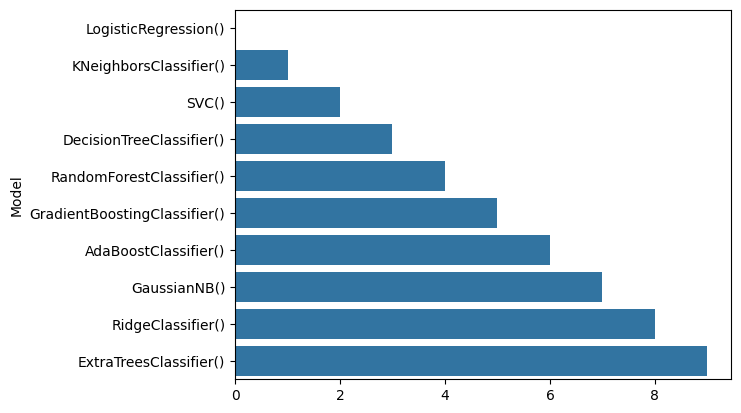

In [147]:
sns.barplot(models['Model'])

<Axes: >

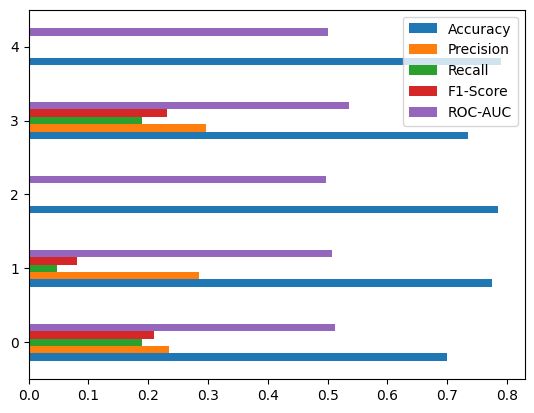

In [ ]:
models.head(5).plot(kind='barh')

<Axes: >

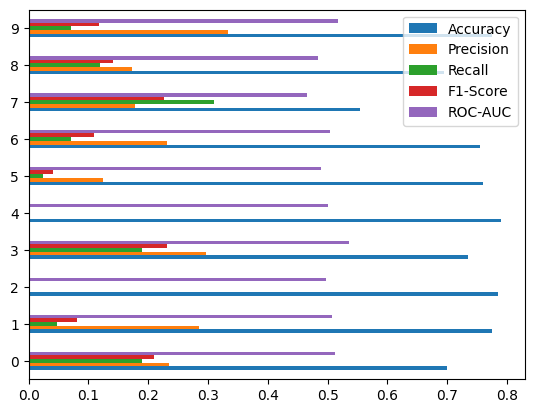

In [161]:
models.plot(kind='barh')

<Axes: >

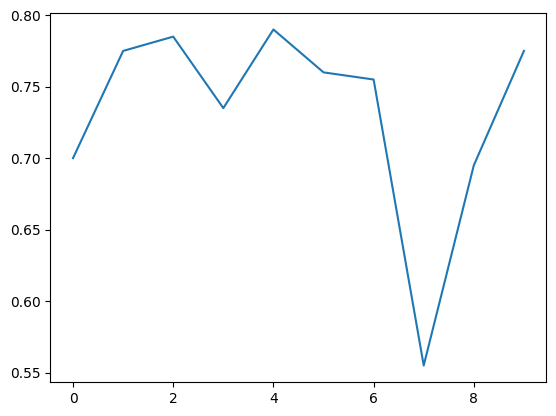

In [163]:
models['Accuracy'].plot()

<Axes: >

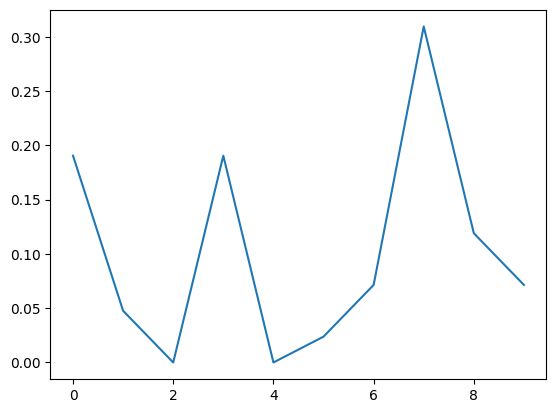

In [164]:
models['Recall'].plot()

<Axes: >

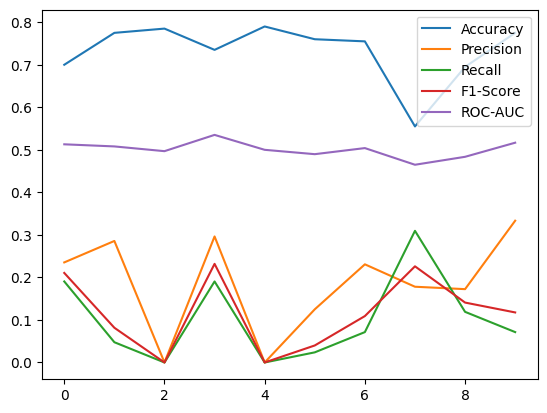

In [166]:
models.iloc[:,1:].plot()

<Axes: ylabel='Frequency'>

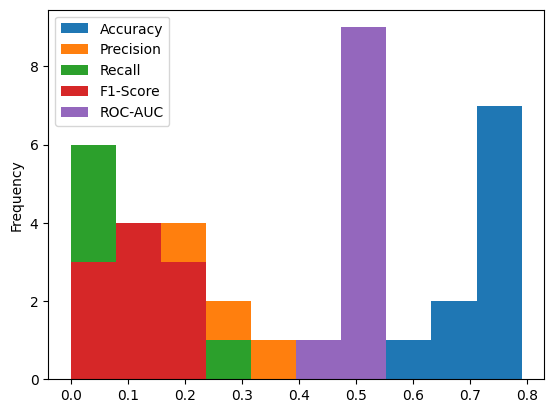

In [168]:
models.iloc[:,1:].plot(kind='hist')